# Bayesian Inference
OCNC 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


## Coin toss
Estimate the parameter $\mu$, probability for a coin to land head up, after n tosses.

In [2]:
mu = 0.4  # probability of head
n = 10   # number of samples
y = np.random.rand(n)<mu # binary observation sequence
y

array([False,  True, False, False,  True, False, False,  True, False,  True], dtype=bool)

Assume a flat prior $P(\mu)=1$ for $0\le\mu\le 1$.  
Multiply prior and likelihood, and normalize to make the posterior.  
Make posterior as the new prior.

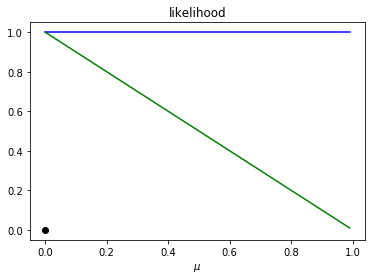

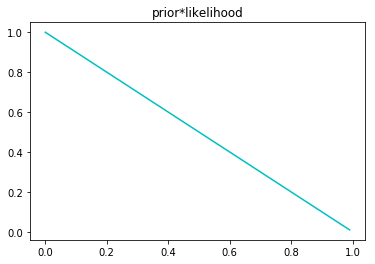

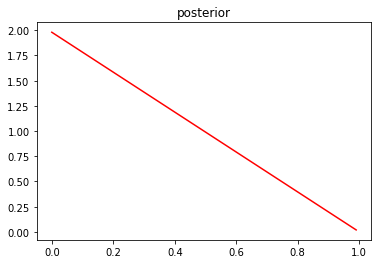

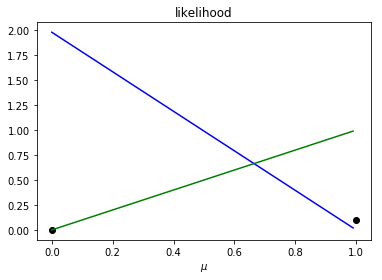

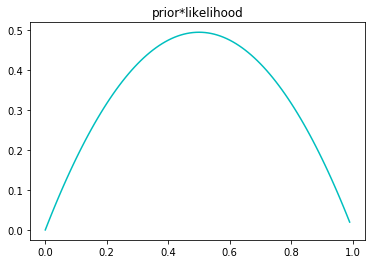

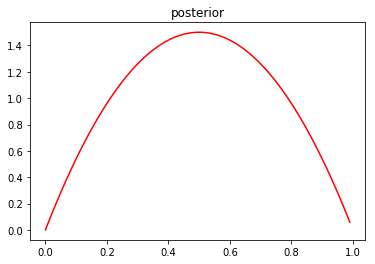

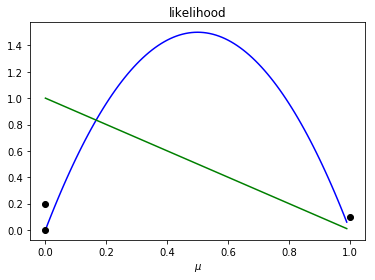

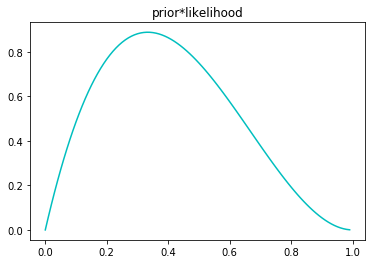

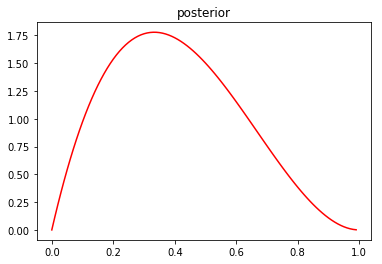

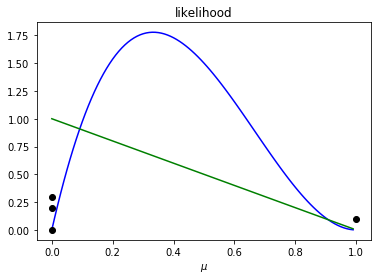

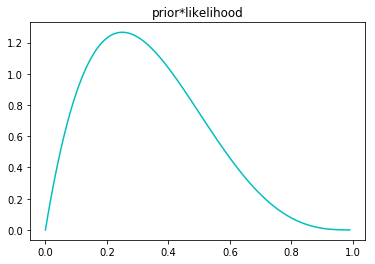

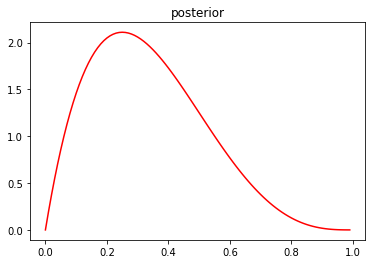

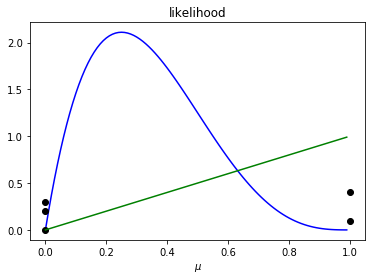

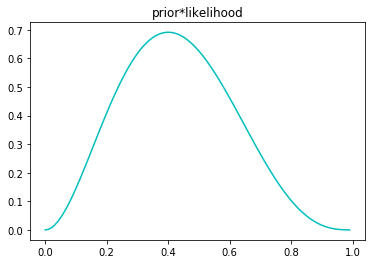

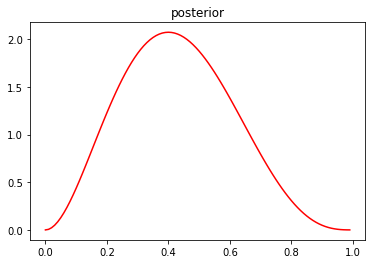

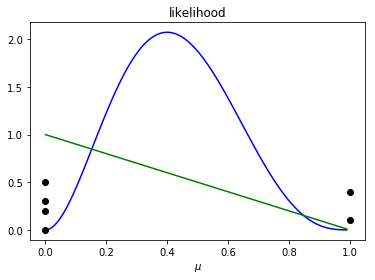

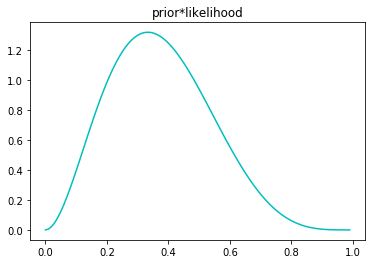

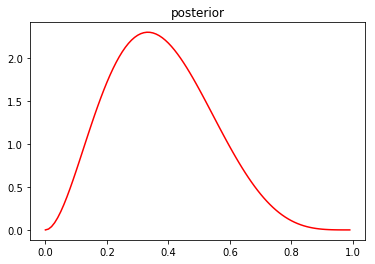

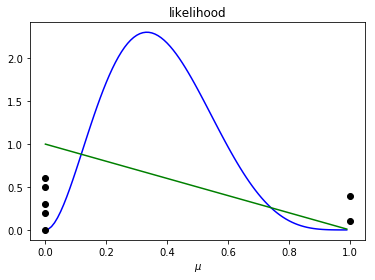

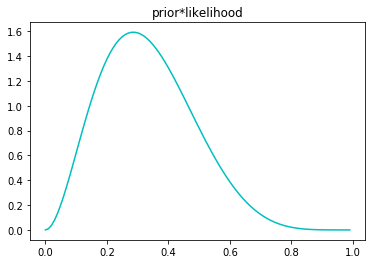

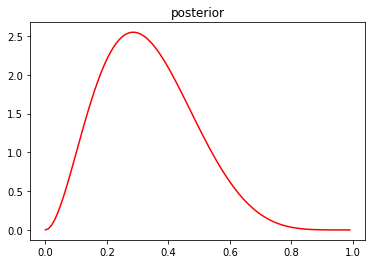

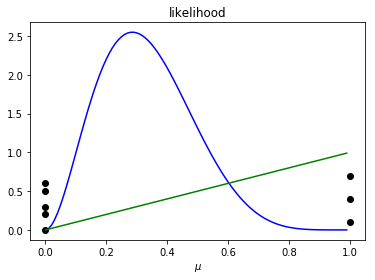

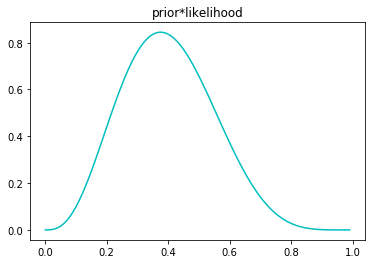

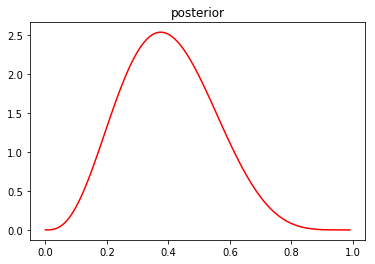

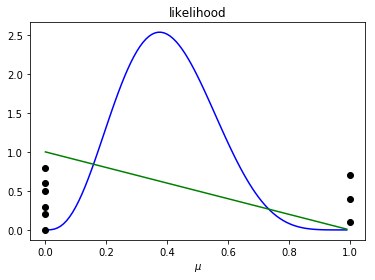

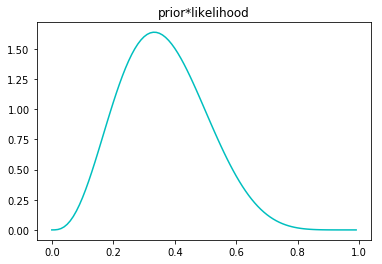

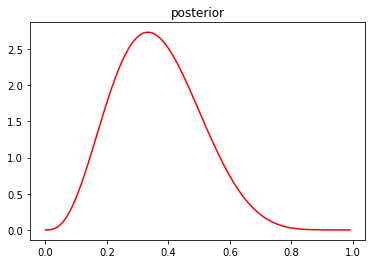

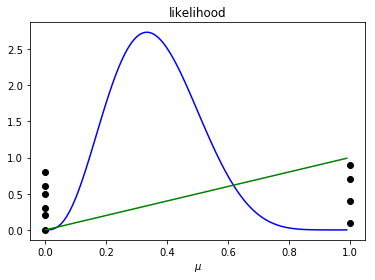

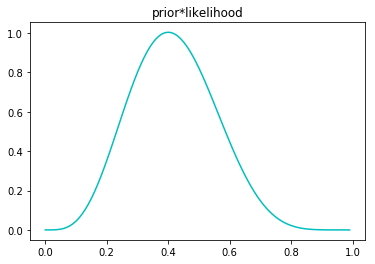

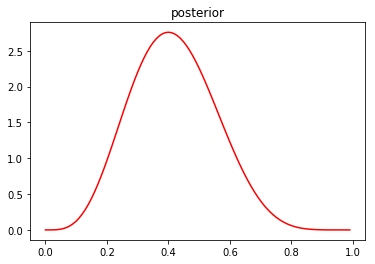

In [3]:
dt = 0.2   # puase for animation
dx = 0.01  # plot step
x = np.arange( 0, 1, dx)  # range of the parameter
prior = np.ones( len(x))  # uniform prior
for i in range(n):
    plt.cla()
    plt.plot( x, prior, 'b')
    plt.xlabel('$\mu$')
    plt.title('prior')
    plt.plot( y[0:i+1], np.arange(i+1)/n, 'ko')
    likelihood = x*y[i] + (1-x)*(1-y[i]) # theta if head, 1-theta if tail
    plt.plot( x, likelihood, 'g')
    plt.title('likelihood')
    plt.pause(dt)
    prilik = prior*likelihood
    plt.plot( x, prilik,'c')
    plt.title('prior*likelihood')
    plt.pause(dt)
    marginal = sum(prilik)*dx    # integrate over the parameter range
    posterior = prilik/marginal  # normalize
    plt.plot( x, posterior, 'r')
    plt.title('posterior')
    plt.pause(dt)
    input()   # wait for return key
    prior = posterior

For a parameter $\mu$, the number $k$ of heads in $n$ tosses follows a Binomial distribution $\propto \mu^k(1-\mu)^{n-k}$.  
For observation of $k$ heads in $n$ tosses, the posterior for $\mu$ is given by a Beta distribution $\propto \mu^k(1-\mu)^{n-k}$.

## Target tracking
Estimate the mean $\mu$ from noisy observations.

In [ ]:
# Noisy observation: y = N(mu,sigma)
mu = 2
sigma = 1
n = 10
y = mu + sigma*np.random.randn(n)
#y = [(0 if i<5 else 2) for i in range(n)] + sigma*np.random.randn(n)
y

For simplicity, assume that we know the noise level $\sigma$.  
Assume a wide Gaussian prior $N(\mu_0,\sigma_0)$ for $\mu$.  

In [ ]:
mu0 = 0
sigma0 = 5
dt = 0.2   # puase for animatino
dx = 0.05   # plot step
x = np.arange( -5, 5, dt)
prior = np.exp(-(x/sigma0)**2/2)/(np.sqrt(2*np.pi)*sigma0)
for i in range(n):
    plt.cla()
    plt.plot( x, prior, 'b')
    plt.xlabel('mu')
    plt.title('prior')
    plt.plot( y[0:i+1], np.arange(i+1)/n, 'ko')
    likelihood = np.exp(-((y[i]-x)/sigma)**2/2)/(np.sqrt(2*np.pi)*sigma)
    plt.plot( x, likelihood, 'g')
    plt.title('likelihood')
    plt.pause(dt)
    prilik = prior*likelihood
    plt.plot( x, prilik,'c')
    plt.title('prior*likelihood')
    plt.pause(dt)
    marginal = sum(prilik)*dt
    posterior = prilik/marginal
    plt.plot( x, posterior, 'r')
    plt.title('posterior')
    plt.pause(dt)
    input()
    prior = posterior

For Gaussian prior and likelihood, the posterior mean is a Gaussian $P(\mu|Y) = N(\mu_n,\sigma_n)$ with  
$$ \mu_n = \frac{\sigma^2\mu_0 + \sigma_0^2\sum_i^n y_i}{n\sigma_0^2 + \sigma^2} $$  
$$ \frac{1}{\sigma_n^2} = \frac{1}{\sigma_0^2}+\frac{n}{\sigma^2} $$  